In [2]:

#Import data from data source
import os
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd

import pandas_datareader as pdr
def get_ticker_df(_ticker):
    df = pdr.get_data_tiingo(_ticker, api_key='f0f2dac586726c8b6d19534c263f4874cc8b989c')
    df = df.reset_index(level=[0,1])
    df.index = df['date']
    #Declaring which column is the index - here: date
    df_adj = df.iloc[:,7:12]
    #Slicing the dataFrame here
    df_adj.columns = ['Close','High','Low','Open','Volume']
    return df_adj


def RSI(_src, _period):
    import pandas as pd
    Chg = _src - _src.shift(1)
    #df.shift(1) naturally itself is a dataframe. The only difference is df.shift(1) all data move backwards by one block. 
    Chg_pos = pd.Series(index=Chg.index, data=Chg[Chg>0])  
    #creating a new Series here. 
    #Google sheet logic. When coding this part, could keep print out the Series / DataFrame to see the changes.
    # index = Chg.index --> Using the same lists of data as "index"
    #data: 
    Chg_pos = Chg_pos.fillna(0)
    #fill up the missing value with the value inside fillna(_input)
    
    #A new variable created!
    
    
    Chg_neg = pd.Series(index=Chg.index, data=-Chg[Chg<0])
    Chg_neg = Chg_neg.fillna(0)
    
    #ALl operation above is going around "DataFrame".
    
    
    #All operations in the following is going around "List"
    
    import numpy as np
    up_mean = []
    down_mean = []
    for i in range(_period+1, len(Chg_pos)+1):
        #principle for "for-loop": expand it such that it takes most data 
        
        #why need to "+1" on the first term - "_period+1"?
        # Every indicator with lookback period = N, they need N rows of data before them. And the first calculation would be made in the N+1 row.
        
        #why need to "+1" on the later term?
        #location index is starting from Zero. So when we want to get the locatio index from "length", need to +1.
        
        
        # numerous append operations to the list. 
        
        
        up_mean.append(np.mean(Chg_pos.values[i-_period:i]))
        #If you want, you can explicate the calculation formula outside of the append() to make it clear
        down_mean.append(np.mean(Chg_neg.values[i-_period:i]))
    
    
    #calculate RSI
    rsi = []
    for i in range(len(up_mean)):
        rsi.append( 100 * up_mean[i] / ( up_mean[i] + down_mean[i] ) )
    
    #Why we don't need "+1" in this operation?
    # range() function: "start" is an optional parameter.
    # when only specifying one parameter, range() 
    
    
    #In the process of calculating the list, the "array lot location" doesn't very big issue. 
    #We need to define the index for each data anyways.
    
    #After making the calculation, putting back the lists into the "Series".
    
    rsi_series = pd.Series(index = _src.index[_period:], data = rsi)  
    #index = _src.index[_period:]
    #Recall df
    
    #making the "Series" here. 
    return rsi_series


#MAIN
df_SPY = get_ticker_df('SPY')
SPY_Close = get_ticker_df('SPY').Close

print(df_SPY)
#print(RSI(SPY_Close,12))


                                Close        High         Low        Open  \
date                                                                        
2016-11-23 00:00:00+00:00  201.411307  201.466061  200.544337  200.754232   
2016-11-25 00:00:00+00:00  202.159647  202.196146  201.694212  201.776356   
2016-11-28 00:00:00+00:00  201.210533  202.123136  201.101026  201.831110   
2016-11-29 00:00:00+00:00  201.602960  202.086637  200.927629  201.247045   
2016-11-30 00:00:00+00:00  201.119281  202.433430  201.055393  202.260034   
...                               ...         ...         ...         ...   
2021-11-15 00:00:00+00:00  467.430000  468.810000  466.230000  468.640000   
2021-11-16 00:00:00+00:00  469.280000  470.485000  467.070000  467.150000   
2021-11-17 00:00:00+00:00  468.140000  469.190000  467.480000  469.000000   
2021-11-18 00:00:00+00:00  469.730000  470.010000  466.340000  469.240000   
2021-11-19 00:00:00+00:00  468.890000  470.940000  468.500000  469.610000   

date
2016-11-23 00:00:00+00:00    21.148492
2016-11-25 00:00:00+00:00    35.586858
2016-11-28 00:00:00+00:00    44.804321
2016-11-29 00:00:00+00:00    50.285521
2016-11-30 00:00:00+00:00    52.925771
                               ...    
2021-11-15 00:00:00+00:00     4.070378
2021-11-16 00:00:00+00:00     4.043499
2021-11-17 00:00:00+00:00     3.811911
2021-11-18 00:00:00+00:00     3.728598
2021-11-19 00:00:00+00:00     3.496137
Length: 1257, dtype: float64
date
2016-11-23 00:00:00+00:00     4.208655
2016-11-25 00:00:00+00:00    10.453073
2016-11-28 00:00:00+00:00    17.289143
2016-11-29 00:00:00+00:00    23.855586
2016-11-30 00:00:00+00:00    29.640697
                               ...    
2021-11-15 00:00:00+00:00     4.679512
2021-11-16 00:00:00+00:00     4.552942
2021-11-17 00:00:00+00:00     4.405473
2021-11-18 00:00:00+00:00     4.270772
2021-11-19 00:00:00+00:00     4.116616
Length: 1257, dtype: float64


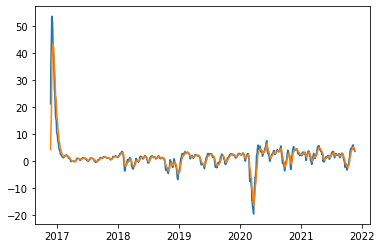

In [4]:
#Correction: 


def bear_macd(_src,  sc,  lc,  sp ):
    import pandas as pd
    fs = [0]      
    ss = [0]  #have to define the first data here because the following formula need to refer to prior value.
    s = [0]
    r = [0]
    for i in range(len(_src)):
        #range: total number of item in the list: len(_src)
        fs.append(fs[-1] + 2.0 / (1.0+sc) * (_src[i] - fs[-1])) #
        ss.append(ss[-1] + 2.0 / (1.0+lc) * (_src[i] - ss[-1]))
    fs_series = pd.Series(index=_src.index, data = fs[1:])
    ss_series = pd.Series(index=_src.index, data = ss[1:])
    r = fs_series - ss_series
    for i in range(len(_src)):
        s.append(s[-1] + 2.0/(1+sp)*(r[i]-s[-1]))
        
    s_series = pd.Series(index=_src.index, data=s[1:])
    
    return [r, s_series]
    
SPY_Close = get_ticker_df('SPY').Close
[macd,signal] = bear_macd(SPY_Close,8.3896,17.5185,9.05)
plt.plot(macd)
plt.plot(signal)
print(macd)
print(signal)

#Note: I found the fast / slow / signal is a fixed number in many website.
